# Determinism

*Code to create Figure 3a in [Saliency Cards: A Framework to Characterize and Compare
Saliency Methods](https://arxiv.org/abs/2206.02958).*

Determinism measures if a saliency method will always produce the same saliency map given a particular input, label, and model.

To illustrate determinism, we show how [LIME](https://arxiv.org/abs/1602.04938), a non-deterministic method can produce different saliency maps on different runs of the algorithm.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision.models

from interpretability_methods.lime import LIME
from interpretability_methods.util import visualize_saliency
from util import melanoma_transform, load_model_from_pytorch, load_pil_image

## Load Melanoma Image and Trained ResNet50
In this example, we use skin lesion images from [ISIC Melanoma Classification](https://www.kaggle.com/competitions/siim-isic-melanoma-classification/overview). We use a ResNet50 we trained to classify melanoma images as cancerous or benign. 

The model was trained with cross entropy loss, adam optimization, random flips, and class balancing. It achieves 0.84 ROC AUC on 20% held out test set.

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = load_model_from_pytorch('resnet50', False, device, num_classes=2).eval()

In [4]:
model_path = './resources/melanoma_model.pth'
model.load_state_dict(torch.load(model_path));

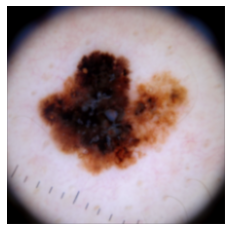

In [5]:
image_path = './resources/melanoma.png'
image = load_pil_image(image_path)

model_transform = melanoma_transform(test=True, normalize=True)
display_transform = melanoma_transform(test=True, normalize=False)

image_input = model_transform(image)
display_image = display_transform(image).numpy().transpose(1, 2, 0)
plt.imshow(display_image)
plt.axis('off');

In [6]:
image_batch = image_input.unsqueeze(0).to(device)
display_image_batch = np.expand_dims(display_image, 0)

In [7]:
prediction = np.argmax(model(image_batch).detach().cpu().numpy())
print(f"Model predicts: {'melanoma' if prediction == 1 else 'benign'}")

Model predicts: melanoma


## Extract LIME Saliency Maps

In [26]:
seed = 0
torch.manual_seed(seed)
np.random.seed(seed)

In [27]:
lime = LIME(model)

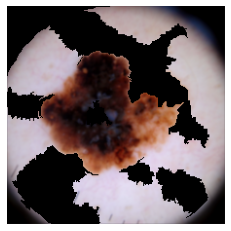

In [28]:
lime_saliency_run1 = lime.get_saliency(image_batch, num_samples=10)
visualize_saliency(lime_saliency_run1, images=display_image_batch, image_cmap='gray', overlay='mask');

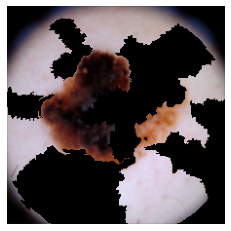

In [29]:
lime_saliency_run2 = lime.get_saliency(image_batch, num_samples=10)
visualize_saliency(lime_saliency_run2, images=display_image_batch, image_cmap='gray', overlay='mask');